# Micro Mobility Prediction

This is the start for the project in course NGEN27.

#### load modules

In [41]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score, ConfusionMatrixDisplay

#### load, select and split data

In [34]:
data = pd.read_csv('micromobility_choice.csv')
data.head()

,ID,slng,slat,elng,elat,duration,distance,elevation_difference,temperature,windSpeed,day_week,hour_day,restaurant,public facility,medical,accommodation,tourist attraction,transportation,education,TripType
0,0,8.496727,47.378521,8.490380,47.381591,194,587,0,10,7,0,22,0,1,0,0,0,0,0,1
1,1,8.537729,47.379719,8.523722,47.389900,5754,1547,3,0,4,1,6,0,1,0,0,0,1,0,1
2,2,8.510418,47.381356,8.523818,47.377148,442,1112,-4,6,4,1,17,2,2,0,0,0,0,0,1
3,3,8.535119,47.355189,8.536068,47.377502,1901,2482,-3,7,9,1,13,1,8,0,0,0,0,0,1
4,4,8.518982,47.386741,8.516692,47.389777,193,379,3,5,24,0,11,0,1,0,2,0,1,0,1


In [35]:
data = data.drop('ID', axis = 'columns') # drop ID
X = data.drop('TripType', axis = 'columns') # drop target 
y = data.iloc[:,-1:] # select target by dropping all features

In [36]:
# check for NA values
nan_check = data.isna().any().any()

if nan_check:
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [37]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, train_size = 0.70, random_state = 42)

#### Task 1:
Develop random forest classification model using scikit-learn python library to predict the choice
based on the features. In this task, you can keep the hyperparameters on default settings.

In [43]:
# set up RF classifier with default (hyper)parameter values 
RF_model = RandomForestClassifier(n_estimators=100, 
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='sqrt', 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                       bootstrap=True, 
                       oob_score=False, 
                       n_jobs=None, 
                       random_state=None, 
                       verbose=0, 
                       warm_start=False, 
                       class_weight=None, 
                       ccp_alpha=0.0, 
                       max_samples=None, 
                       monotonic_cst=None)

# train random forest 
RF_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\envs\geoAI\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
# evaluation metric

y_pred = RF_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [59]:
### attention: this is now weighted averaging!
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(f"F1: {f1_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average = 'weighted')}")


F1: 0.7355079700164822
Recall: 0.7355555555555555
Precision: 0.7364009004896916


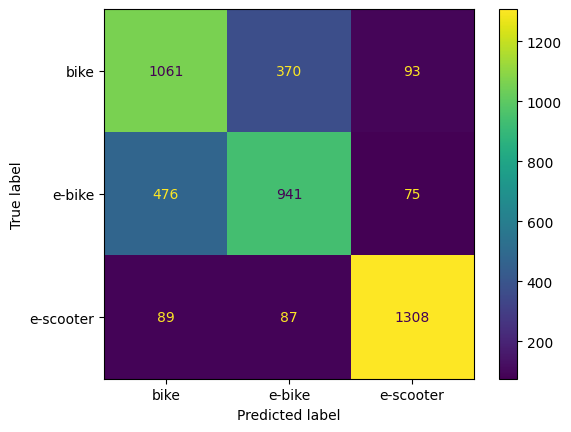

In [62]:
ConfusionMatrixDisplay(confusion, 
                      display_labels = ['bike', 'e-bike', 'e-scooter']).plot()

#### Task 2 

Implement hyperparameter tuning and develop the optimal random forest classification model.
Compare the prediction performance with that of the two models in Task 1.

#### feature selection

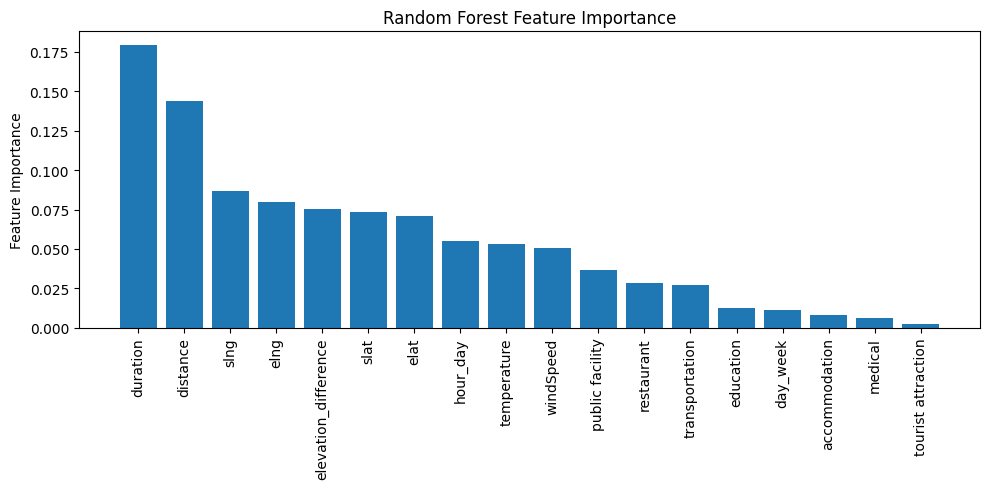

In [64]:
### explore for feature importance first

feature_importances = RF_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90, fontsize=10)
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


#### hyperparameter tuning using random search


In [66]:
from sklearn.model_selection import RandomizedSearchCV

#### hyperparameter tuning using random search

In [74]:
param_distributions = {
    'n_estimators': [20, 50, 100, 200, 500, 750, 1000],
    'max_depth': [3, 5, 10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions, n_iter=50, cv=5, n_jobs=-1, verbose = 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Lenovo\anaconda3\envs\geoAI\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [20, 50, ...]}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


0.7368888888888889
F1: 0.7368953382259265
Recall: 0.7368888888888889
Precision: 0.7380817234337723


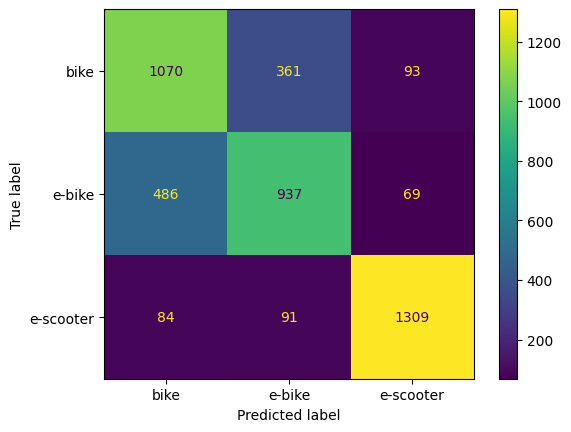

In [76]:
# predict test features
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

### attention: this is now weighted averaging!
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(f"F1: {f1_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average = 'weighted')}")

# plot confusion matrix
ConfusionMatrixDisplay(confusion, 
                      display_labels = ['bike', 'e-bike', 'e-scooter']).plot()

#### Task 3

Conduct k-fold cross validation and calculate the average evaluation metrics: accuracy, precision,
recall and f1-score.

I'm not quite sure if this task actually makes sense here. I already use cross validation (5 fold) during the hyperparameter tuning.  

#### Task 4

Based on the model in Task 2, visualize the start and end points for the misclassified trips in maps.
The visualization for the three types of shared micro-mobility services should be implemented separately.

In [77]:
# prediction on whole data set
y_pred_full = random_search.predict(X)

In [84]:
# join back in original data frame for plotting
preds = pd.DataFrame({'y_pred_full': y_pred_full})
data = data.join(preds)

In [ ]:
# missclassified 